Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings. (10 points)


3. Get the target column distribution. 


4. Split the data into training and test set in the ratio of 70:30 respectively


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)


6. Print the confusion matrix for all the above models (10 points)


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

1. Read the column description and ensure you understand each attribute well

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#To encode categorical features & feature scalling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

#Logistic Regression Library 
from sklearn.linear_model import LogisticRegression

#k-NN Model Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Model selection Library
from sklearn import model_selection

#Misc
import math

import warnings
warnings.filterwarnings('ignore')

In [67]:
bankdata=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bankdata.columns=["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [68]:
bankdata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
bankdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

Understanding the features/attributes

The variable ID is just the serial number based identifier and do not have any co-relation to other attributes. I think this variable is of no use in predicting whether the customer will borrow a personal loan.

Binary type variables :

1.Personal Loan ( target variable) 
2.Securities Account
3.CD Account
4.Online
5.CreditCard

Interval type variables :

1.Age 
2.Experience 
3.Income 
4.CCAvg 
5.Mortage 

Ordinal Categorical Variables:

1.Family - Family size of the customer
2.Education - education level of the customer

Nominal variable :
1.ID
2.Zip Code

In [70]:
bankdata.shape

(5000, 14)

In [71]:
#checking for NaN values
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [72]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


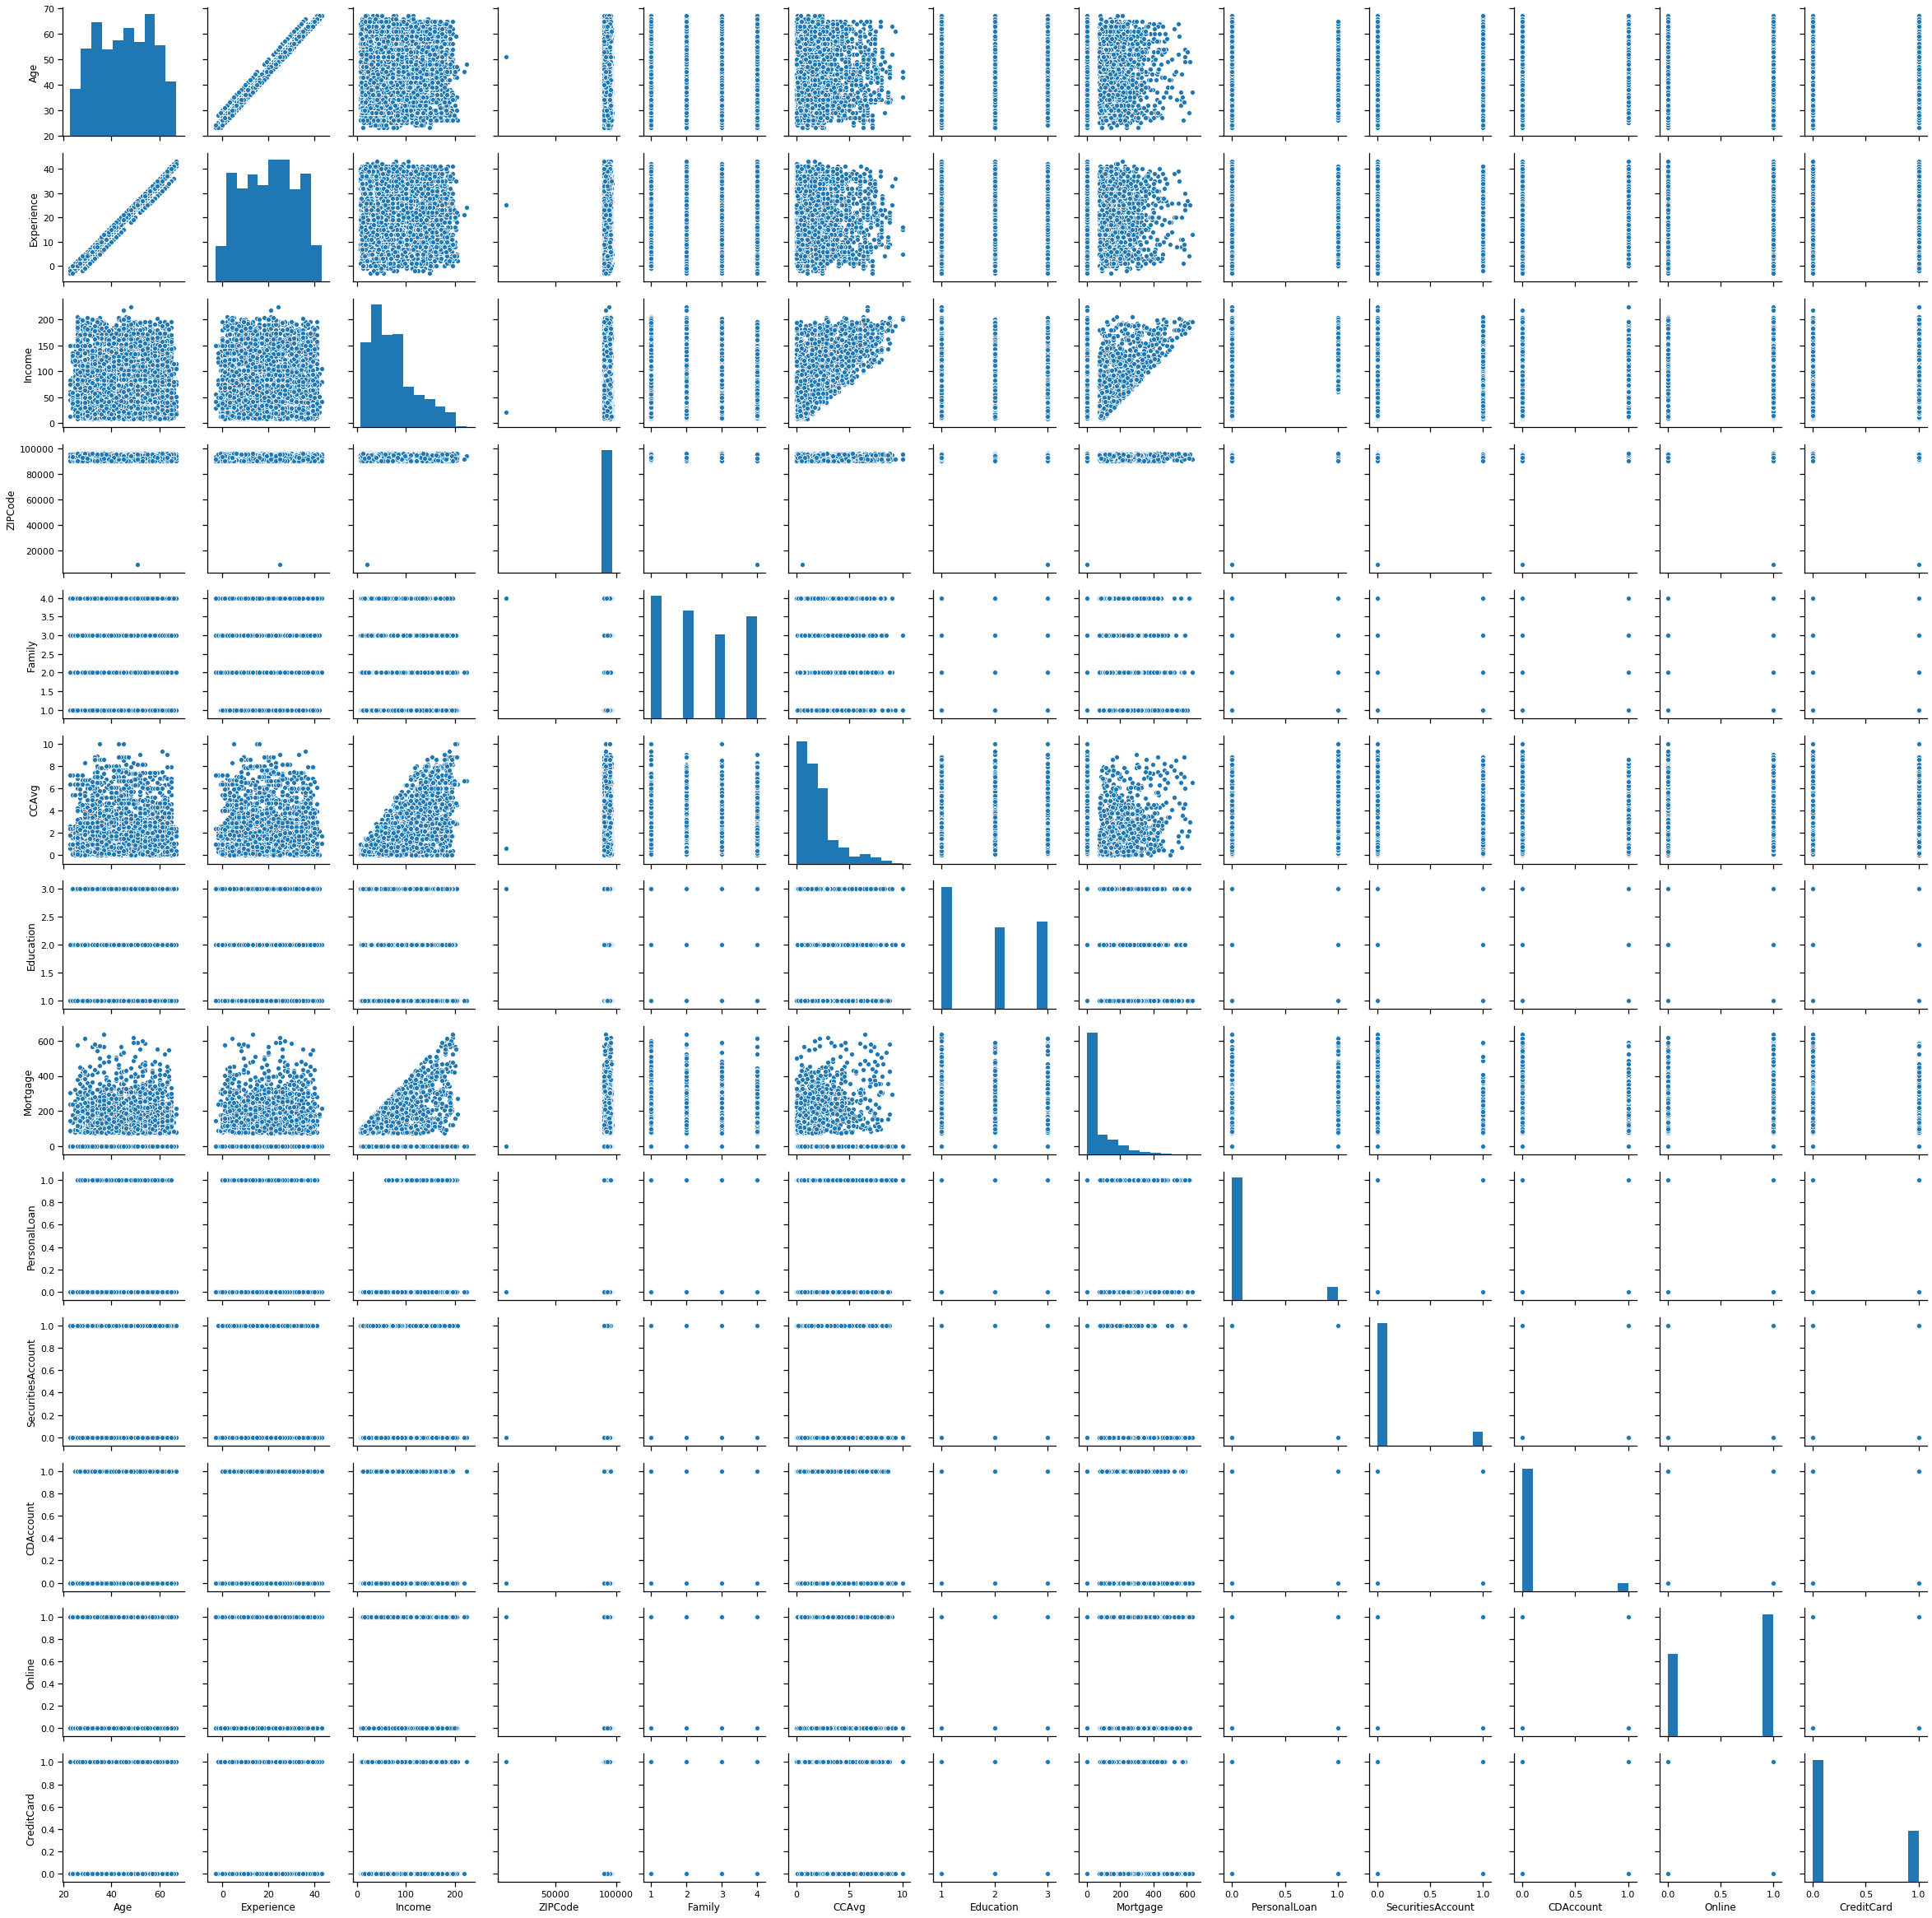

In [73]:
sns.pairplot(bankdata.iloc[:,1:])

Target column distribution observation below:
1. Age shows normal distribution, most of the customers are in the range of 30 - 60 years.
2. Experience shows normal distribution, most of the customers having more than 8 yrs of exp. From the describe output, min appears to be negative value (-3) recorded in the data set, it may be an input error and these values can be dropped. Need to consult an expert for changing the negative values to appropriate data points considering the education and age parameters.

3. Income is postively skewed, most of customers are in between 45-55k
4. CCAvg is postively skewed, avg spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage : 70% of the individuals have mortgage of less than 40K, max value is 635K.



In [74]:
#need to findout the records showing negative experience.

bankdata[bankdata['Experience'] < 0]['Experience'].count()

52

##Create a seprate list of negative experience customers, retrive the age and education parameters, find the matching records ( that of age and education) which has positive experience and replace the negatives with the median of corresponding positive data points

In [75]:
dfExp=bankdata.loc[bankdata['Experience'] >0]
negExp=bankdata.Experience < 0
column_name='Experience'
neglist=bankdata.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [76]:
for id in neglist:
    age = bankdata.loc[np.where(bankdata['ID']==id)]["Age"].tolist()[0]
    education = bankdata.loc[np.where(bankdata['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    median_exp = df_filtered['Experience'].median()
    if (math.isnan(median_exp)):
        bankdata.loc[bankdata.loc[np.where(bankdata['ID']==id)].index,'Experience'] = 0
    else:
        bankdata.loc[bankdata.loc[np.where(bankdata['ID']==id)].index,'Experience'] = median_exp

In [77]:
bankdata[bankdata['Experience'] < 0]['Experience'].count()

0

In [78]:
bankdata.groupby(['PersonalLoan']).count()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


No more negative experience values exists in the data frame;
Re-verifying the describe parameters of the bankdata data frame

In [79]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.125800,11.430053,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [80]:
bankdata.corr()['PersonalLoan']

ID                  -0.024801
Age                 -0.007726
Experience          -0.008042
Income               0.502462
ZIPCode              0.000107
Family               0.061367
CCAvg                0.366889
Education            0.136722
Mortgage             0.142095
PersonalLoan         1.000000
SecuritiesAccount    0.021954
CDAccount            0.316355
Online               0.006278
CreditCard           0.002802
Name: PersonalLoan, dtype: float64

Putting down the correlation matrix to find the influence of various parameters on personal loan.

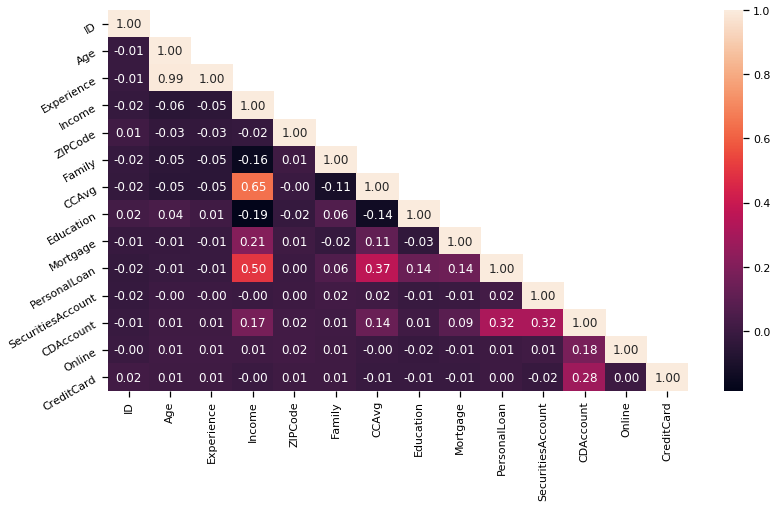

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = bankdata.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# using mask function so that correlation values are shown once

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Writing a function to iterate through all features and find out the co-relation rank

In [82]:
def feature_corr(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in 
                       list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False))
feature_corr(bankdata)

                                pairs      corr
13                  (Age, Experience)  0.994213
38                    (Income, CCAvg)  0.645984
41             (Income, PersonalLoan)  0.502462
65              (CCAvg, PersonalLoan)  0.366889
85     (SecuritiesAccount, CDAccount)  0.317034
82          (PersonalLoan, CDAccount)  0.316355
89            (CDAccount, CreditCard)  0.278644
40                 (Income, Mortgage)  0.206806
88                (CDAccount, Online)  0.175880
43                (Income, CDAccount)  0.169738
76           (Mortgage, PersonalLoan)  0.142095
71          (Education, PersonalLoan)  0.136722
67                 (CCAvg, CDAccount)  0.136534
64                  (CCAvg, Mortgage)  0.109905
78              (Mortgage, CDAccount)  0.089311
56                (Family, Education)  0.064929
58             (Family, PersonalLoan)  0.061367
18                   (Age, Education)  0.041334
81  (PersonalLoan, SecuritiesAccount)  0.021954
6                     (ID, Education)  0

Observations :

1.Income(50%) and CCAvg(37%) are moderately correlated.
2.Age and Experience have a high co-relation value (99%)

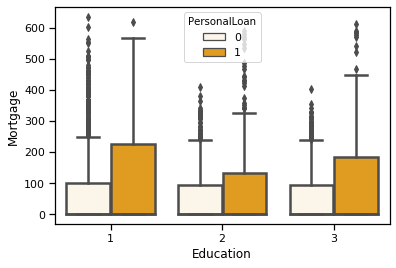

In [83]:
sns.boxplot(x='Education', y='Mortgage', hue='PersonalLoan', data=bankdata, color='Orange')

High mortage can be observed in both cases ie customers who do not have personal loan and customers who have personal loan.

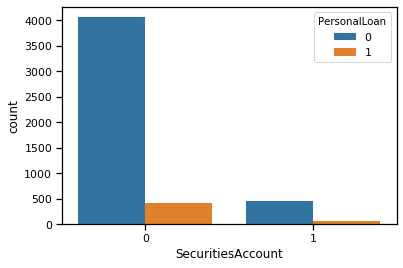

In [84]:
sns.countplot(x='SecuritiesAccount', hue='PersonalLoan', data=bankdata)

Majority of customers who do not have loan have securities account

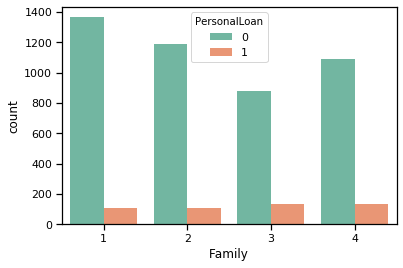

In [85]:
sns.countplot(x='Family', hue='PersonalLoan', data=bankdata, palette='Set2')

Family size do not impact personal loan, however, families (especially of size 3) are more likely to take loan ( due to less count), this aspect may be considered for targetting such customers.

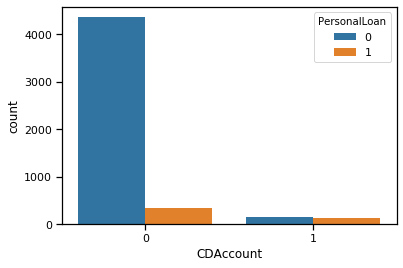

In [86]:
sns.countplot(x='CDAccount', hue='PersonalLoan', data=bankdata)

Customers who do not have CD account are less lilely to take up personal loans. Almost all customers who have CD account have personal loan as well.

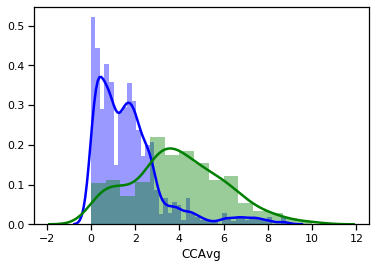

In [87]:
sns.distplot(bankdata[bankdata['PersonalLoan'] == 0]['CCAvg'], color = 'b')
sns.distplot(bankdata[bankdata['PersonalLoan'] == 1]['CCAvg'], color = 'g')

In [88]:
print("Avg. Credit Card spending of Non-Loan Customers: ", bankdata[bankdata['PersonalLoan'] == 0]['CCAvg'].median()*1000)
print("Avg. Credit Card spending of Loan customers: ", bankdata[bankdata['PersonalLoan'] == 1]['CCAvg'].median()*1000)

Avg. Credit Card spending of Non-Loan Customers:  1400.0
Avg. Credit Card spending of Loan customers:  3800.0


Inference : On an Avg, customers who have taken Loan tend to spend higher than customers who haven't taken loan.

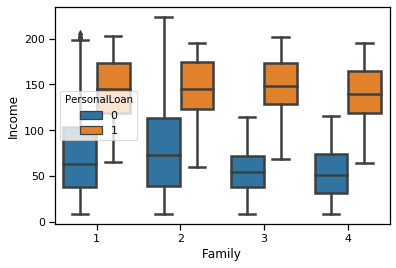

In [89]:
sns.boxplot(x='Family', y='Income', hue='PersonalLoan', data=bankdata)

Families with income less than 100k are less likely to take loan than families with high income.

Splitting the data set in train and test using 

In [90]:
#Making copies of dataframe & removing ID and Target Attribute
X = bankdata.copy()
X.drop(['ID', 'PersonalLoan'], axis = 1, inplace=True)
#Select all rows and the 10th column which is the classification of "Taken (1)", "Not Taken (0)" for customers
Y = bankdata.iloc[:,9]

X = np.array(X)
Y = np.array(Y)
#Taking 70:30 training and test set
test_size = 0.30
#Random number seeding for reapeatability of the code
seed = 1  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("Split Train and Test Shape")
print("--------------------------")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Sc = StandardScaler()
scaledX_train = Sc.fit_transform(X_train)
scaledX_test = Sc.transform(X_test)
print("Scaled Split Train and Test Shape")
print("---------------------------------")
print(scaledX_train.shape)
print(scaledX_test.shape)

Split Train and Test Shape
--------------------------
(3500, 12)
(1500, 12)
(3500,)
(1500,)
Scaled Split Train and Test Shape
---------------------------------
(3500, 12)
(1500, 12)


##Applying Models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

Naive Bayes MODEL

In [104]:
#Invoking the GaussianNB classifier function.
gnb_model=GaussianNB()

print(scaledX_train.shape)
print(scaledX_test.shape)

(3500, 12)
(1500, 12)


In [133]:
#Invoking the GaussianNB classifier function.
gnb_model.fit(scaledX_train, Y_train)
print("Training Score: ", gnb_model.score(scaledX_train, Y_train))

#Invoking the GaussianNB classifier function.
Y_predict = gnb_model.predict(scaledX_test)
print("Testing Score: ", gnb_model.score(scaledX_test, Y_test))


Training Score:  0.89
Testing Score:  0.8766666666666667


Scaling reduces the accuracy of Naive Bayes algorithm

In [94]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1231  120]
 [  65   84]]


We have got 1,231 out of 1,351 i.e. 89% correct predictions for customers not taking loan. 84 out of 149 i.e. 57% correct predictions for customer taking personal loan.


In [95]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



KNN MODEL

In [97]:
#Creating common function for kNN 
def knn_func(neighbors1, train_accuracy_plot1, test_accuracy_plot1):
    for i, k in enumerate(neighbors1):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(scaledX_train, Y_train)
        #Compute accuracy on the training set
        train_accuracy_plot1[i] = knn_model.score(scaledX_train, Y_train)
        #Compute accuracy on the testing set
        test_accuracy_plot1[i] = knn_model.score(scaledX_test, Y_test)
        #Print Result
        print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k, test_accuracy_plot1[i], train_accuracy_plot1[i]))
#Initiating the Model with K = 1, 3, 5 ... 19
neighbors = np.arange(1, 22, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
knn_func(neighbors, train_accuracy_plot, test_accuracy_plot)

For K=1, Test Accuracy=0.944667, & Train Accuracy=1.000000
For K=3, Test Accuracy=0.948667, & Train Accuracy=0.974000
For K=5, Test Accuracy=0.949333, & Train Accuracy=0.970286
For K=7, Test Accuracy=0.948000, & Train Accuracy=0.964286
For K=9, Test Accuracy=0.946000, & Train Accuracy=0.961714
For K=11, Test Accuracy=0.942667, & Train Accuracy=0.957429
For K=13, Test Accuracy=0.943333, & Train Accuracy=0.955143
For K=15, Test Accuracy=0.943333, & Train Accuracy=0.954571
For K=17, Test Accuracy=0.940000, & Train Accuracy=0.952571
For K=19, Test Accuracy=0.938667, & Train Accuracy=0.953143
For K=21, Test Accuracy=0.937333, & Train Accuracy=0.950571


k=5 is producing better acuracy.

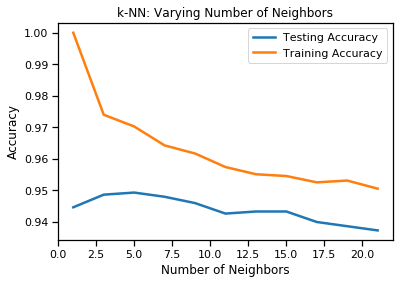

In [98]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [130]:
#generating training and test score for K=5
k=5

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(scaledX_train, Y_train)
#Print Result
print("Training Score: ", knn_model.score(scaledX_train , Y_train))
print("Testing Score: ", knn_model.score(scaledX_test , Y_test))
Y_predict = knn_model.predict(scaledX_test)

Training Score:  0.9702857142857143
Testing Score:  0.9493333333333334


In [102]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1345    6]
 [  70   79]]


In [103]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.93      0.53      0.68       149

    accuracy                           0.95      1500
   macro avg       0.94      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



Logistic Regression MODEL

In [107]:
#Invoking the logistics regression classifier function.
lr_model = LogisticRegression(random_state=seed)

In [131]:
#Invoking the logistics regression classifier function.
lr_model.fit(scaledX_train, Y_train)

print("Training Score: ", lr_model.score(scaledX_train , Y_train))
Y_predict = lr_model.predict(scaledX_test)
print("Testing Score: ", lr_model.score(scaledX_test , Y_test))

Training Score:  0.9531428571428572
Testing Score:  0.948


In [111]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1335   16]
 [  62   87]]


With logistics regression we have got 1,335 out of 1,351 i.e. 98% correct predictions for customers not taking loan and 87 out of 149 i.e. 58% correct predictions for customer taking personal loan.

In [113]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



Naive Bayes model's accuracy = 0.88 or 88%
kNN model's accuracy = 0.95 or 95% also F1 score is 97 % which is balance between precision and recall. 
Logistics Regression model's accuracy = 0.95 or 95% 

Conclusion : The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. Three algorithms were used in this study considering the various for the new marketing campaign. From the model comparision graph , it appears that kNN algorithm have the highest accuracy and Thera bank may choose this model for designing marketing campaign.